# Flights vs. Weather Project

## Setting up environment

### Copy .env and sql_functions from previous notebooks

In [1]:
# ! cp /Users/danielschuster/neuefische/Git/forked-da-external-data-sourcing/.env .
# ! cp /Users/danielschuster/neuefische/Git/forked-da-external-data-sourcing/sql_functions.py .

## TASK 1: Historical Weather Event --> Hurricane Katrina, August 23, 2005

### Connect to Meteostat API

In [4]:
# weather_katrina_df = pd.json_normalize(weather_katrina, 
#                                        sep="_", 
#                                        record_path="data", 
#                                     #    meta=[["meta", "generated"], 
#                                     #          ["meta", "stations"]],
#                                        record_prefix="data_",
#                                        errors='ignore')
# weather_katrina_df.head()

### OTHER AIRPORTS FOR DATAFRAMES

* New Orleans, Ln, MSY --> done
* Baton Rouge, La, BTR --> Daniel
* Biloxi, Miss, GPT --> Daniel
* Mobile, Ala, MOB --> Juls
* Pensacola, Fla, PNS --> Juls
* Eglin Air Force Base, Fla, VPS --> Juls

# Getting Weather Data near MSY, BTR and GPT airports during Katrina using get_weather_data.get_katrina_weather_data()

### BTR (Baton Rouge, La)

<AxesSubplot:>

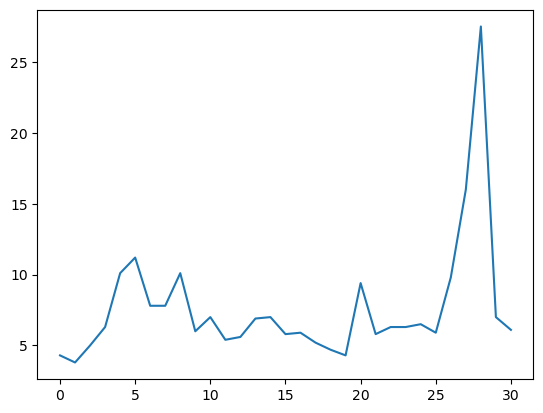

In [1]:
from get_weather_data import get_katrina_weather_data as get_kat_data

btr_data = get_kat_data('30.53236', '-91.151461')
btr_data.head()

btr_data['wspd'].plot()

### GPT (Biloxi, Miss)

In [2]:
gpt_data = get_kat_data('30.413366', '-89.072955')
gpt_data.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2005-08-01,25.8,23.3,31.1,22.9,0.0,NaN,4.0,None,1016.1,None
1,2005-08-02,NaN,23.3,30.6,0.8,0.0,NaN,5.4,None,NaN,None
2,2005-08-03,25.1,21.7,31.1,10.4,0.0,NaN,9.0,None,NaN,None
3,2005-08-04,24.3,22.2,30.6,25.7,0.0,NaN,7.2,None,NaN,None
4,2005-08-05,26.2,21.7,31.7,0.0,0.0,NaN,10.1,None,1016.9,None


### MSY (New Orleans, Ln)

In [3]:
msy_data = get_kat_data('29.9893', '-90.2548')
msy_data.head()

msy_data[msy_data['wspd'] == 27.7]

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
27,2005-08-28,28.9,26.1,32.8,16.5,0.0,54.0,27.7,None,1004.6,None


# Basic Data Cleaning

Dropping 'dwpt', 'rhum', 'wdir', 'snow', 'tsun', 'wpgt', 'coco' and 'prcp' either because information is not valuable or all values are "None"

In [4]:
from get_weather_data import clean_daily_data

msy_clean = clean_daily_data(msy_data, 'MSY')
msy_clean.head()

,date,avg_temp_celsius,wind_speed_kph,air_pressure_hPa,airport_code
0,2005-08-01,27.9,4.3,1016.4,MSY
1,2005-08-02,27.0,5.8,1015.9,MSY
2,2005-08-03,27.9,7.6,1015.1,MSY
3,2005-08-04,26.6,8.3,1016.7,MSY
4,2005-08-05,27.0,10.1,1017.6,MSY


In [5]:
btr_clean = clean_daily_data(btr_data, 'BTR')
btr_clean.head()

,date,avg_temp_celsius,wind_speed_kph,air_pressure_hPa,airport_code
0,2005-08-01,27.9,4.3,1016.4,BTR
1,2005-08-02,28.1,3.8,1015.5,BTR
2,2005-08-03,27.3,5.0,1014.8,BTR
3,2005-08-04,26.1,6.3,1016.4,BTR
4,2005-08-05,27.0,10.1,1017.6,BTR


<AxesSubplot:>

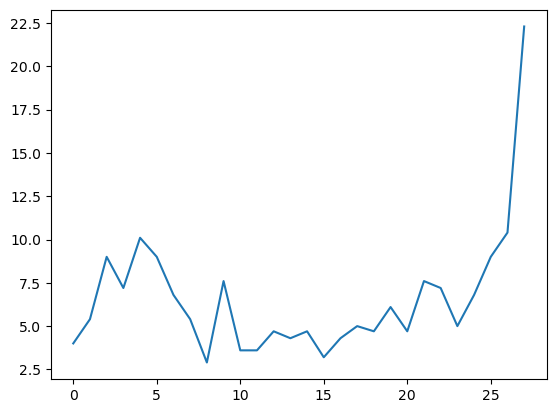

In [6]:
gpt_clean = clean_daily_data(gpt_data, 'GPT')
gpt_clean.head()

gpt_clean['wind_speed_kph'].plot()

In [8]:
from sql_functions import get_engine
from sql_functions import push_to_database
import psycopg2

schema = 'cgn_analytics_22_3'
engine = get_engine()
table_name = 'group_1_weather'                                                                                     #'Group_1_Weather_MSY'

push_to_database(df=msy_clean, table_name=table_name, engine=engine, schema=schema)

NameError: name 'psycopg2' is not defined

In [9]:
schema = 'cgn_analytics_22_3'
engine = get_engine()
table_name = 'Group_1_Weather_GPT'

push_to_database(df=gpt_clean, table_name=table_name, engine=engine, schema=schema)

The Group_1_Weather_GPT table was imported successfully.


In [10]:
schema = 'cgn_analytics_22_3'
engine = get_engine()
table_name = 'Group_1_Weather_BTR'

push_to_database(df=btr_clean, table_name=table_name, engine=engine, schema=schema)

The Group_1_Weather_BTR table was imported successfully.


In [11]:
import pandas as pd

df_all = pd.concat([msy_clean, btr_clean, gpt_clean], axis=0)
df_all.sort_values('date')



,date,avg_temp_celsius,wind_speed_kph,air_pressure_hPa,airport_code
0,2005-08-01,27.9,4.3,1016.4,MSY
0,2005-08-01,25.8,4.0,1016.1,GPT
0,2005-08-01,27.9,4.3,1016.4,BTR
1,2005-08-02,27.0,5.8,1015.9,MSY
1,2005-08-02,NaN,5.4,NaN,GPT
...,...,...,...,...,...
29,2005-08-30,NaN,NaN,NaN,MSY
29,2005-08-30,NaN,NaN,NaN,GPT
30,2005-08-31,28.9,6.1,1010.7,BTR
30,2005-08-31,NaN,6.1,NaN,MSY


In [12]:
from sql_functions import get_dataframe

schema = 'cgn_analytics_22_3'
df_all = get_dataframe(f'SELECT * FROM {schema}.group_1_weather;')

df_all.head()

,date,avg_temp_celsius,wind_speed_kph,air_pressure_hPa,airport_code
0,2005-08-01,25.7,5.8,1016.7,VPS
1,2005-08-02,24.9,5.8,1016.0,VPS
2,2005-08-03,25.2,6.5,1015.6,VPS
3,2005-08-04,24.9,7.5,1017.0,VPS
4,2005-08-05,23.1,7.5,1017.6,VPS


In [13]:
vps_data= []
pns_data= []
mob_data= []

In [14]:
df_all = pd.concat([vps_data, pns_data, mob_data, gpt_data, btr_data, msy_data], axis=0)
df_all

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

# Viewing hourly data to check for number of null values

# MSY

<AxesSubplot:>

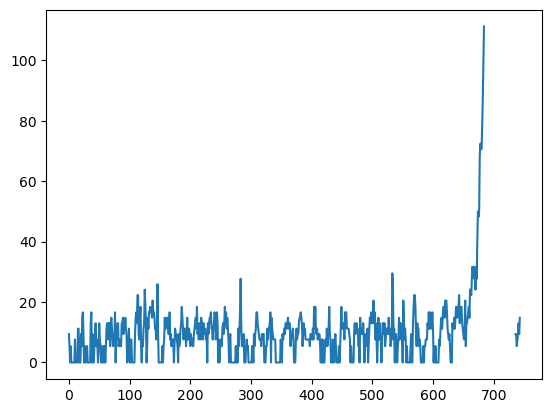

In [30]:
from get_weather_data import clean_hourly_data
#import matplotlib.pyplot as plt

msy_hourly = get_kat_data('29.9893', '-90.2548', 'hourly')

msy_hourly_clean = clean_hourly_data(msy_hourly, 'MSY')

# msy_hourly_clean.wind_speed_kph.sort_values(ascending=False)
msy_hourly_clean.wind_speed_kph.plot()

#plt.plot(msy_hourly_clean.date, msy_hourly_clean.wind_speed_kph)
#plt.xticks

# VPS

<AxesSubplot:>

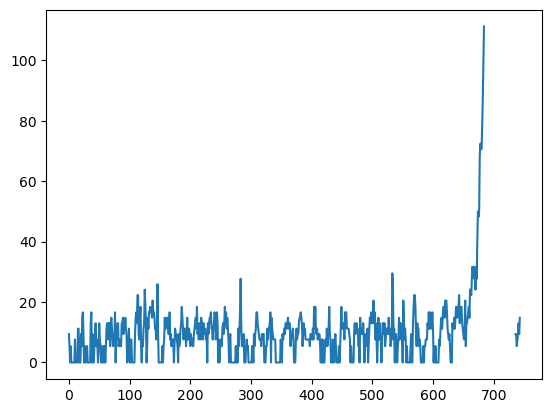

In [33]:
vps_hourly = get_kat_data('30.495438', '-86.549817', 'hourly')

vps_hourly_clean = clean_hourly_data(msy_hourly, 'VPS')

# msy_hourly_clean.wind_speed_kph.sort_values(ascending=False)
vps_hourly_clean.wind_speed_kph.plot()

# BTR

<AxesSubplot:>

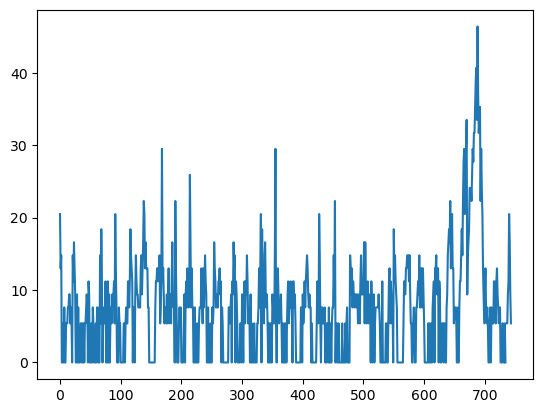

In [34]:
btr_hourly = get_kat_data('30.53236', '-91.151461', 'hourly')

btr_hourly_clean = clean_hourly_data(btr_hourly, 'BTR')

# msy_hourly_clean.wind_speed_kph.sort_values(ascending=False)
btr_hourly_clean.wind_speed_kph.plot()

# GPT

<AxesSubplot:>

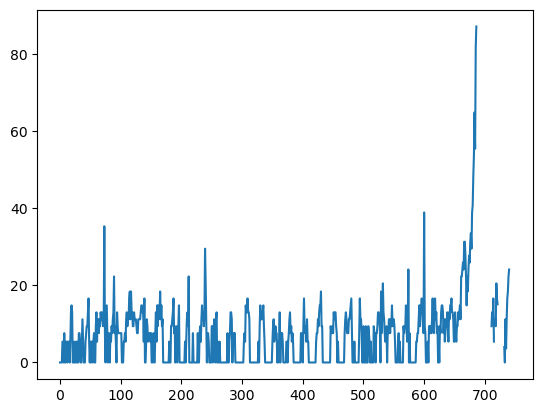

In [35]:
gpt_hourly = get_kat_data('30.413366', '-89.072955', 'hourly')

gpt_hourly_clean = clean_hourly_data(gpt_hourly, 'GPT')

# msy_hourly_clean.wind_speed_kph.sort_values(ascending=False)
gpt_hourly_clean.wind_speed_kph.plot()

# MOB

<AxesSubplot:>

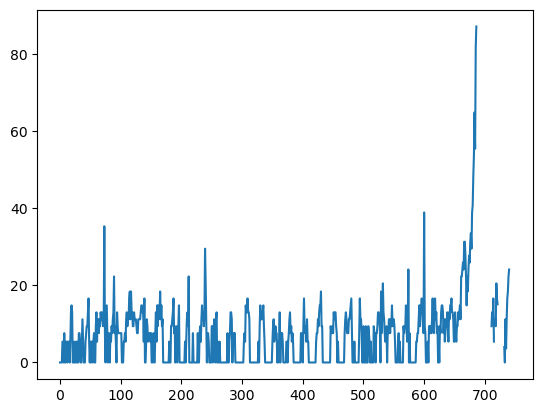

In [36]:
mob_hourly = get_kat_data('30.6882', '-88.2390', 'hourly')

mob_hourly_clean = clean_hourly_data(gpt_hourly, 'MOB')

# msy_hourly_clean.wind_speed_kph.sort_values(ascending=False)
mob_hourly_clean.wind_speed_kph.plot()

# PNS

<AxesSubplot:>

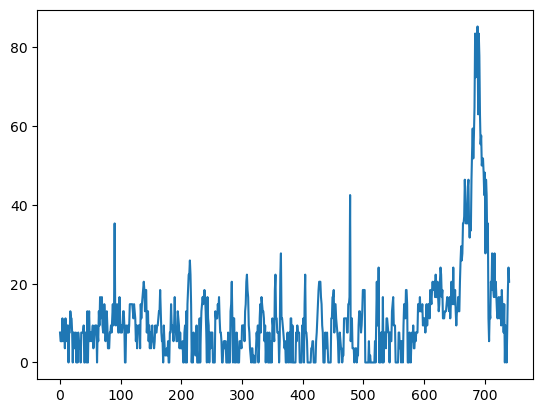

In [38]:
pns_hourly = get_kat_data('30.473816', '-87.186705', 'hourly')

pns_hourly_clean = clean_hourly_data(pns_hourly, 'PNS')

# msy_hourly_clean.wind_speed_kph.sort_values(ascending=False)
pns_hourly_clean.wind_speed_kph.plot()

# Concat all hourly data

In [42]:
df_all = pd.concat([msy_hourly_clean, btr_hourly_clean, gpt_hourly_clean, mob_hourly_clean, pns_hourly_clean, vps_hourly_clean], axis=0)
#df_all.info()

df_all = df_all.drop(columns=['dwpt', 'rhum', 'wdir', 'snow', 'tsun', 'wpgt', 'coco', 'prcp'])
df_all.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4464 entries, 0 to 743
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              4464 non-null   object 
 1   temp_celsius      4285 non-null   float64
 2   wind_speed_kph    4285 non-null   float64
 3   air_pressure_hPa  4384 non-null   float64
 4   airport_code      4464 non-null   object 
dtypes: float64(3), object(2)
memory usage: 209.2+ KB


# Push all hourly data to SQL database

In [44]:
from sql_functions import get_engine
from sql_functions import push_to_database
import psycopg2

schema = 'cgn_analytics_22_3'
engine = get_engine()
table_name = 'group_1_weather_hourly'                                                                                     

push_to_database(df=df_all, table_name=table_name, engine=engine, schema=schema)

The group_1_weather_hourly table was imported successfully.


# Push individual weather data

### MSY

In [45]:
table_name = 'group_1_msy_hourly'
push_to_database(df=msy_hourly, table_name=table_name, engine=engine, schema=schema)

The group_1_msy_hourly table was imported successfully.


### BTR

In [46]:
table_name = 'group_1_btr_hourly'
push_to_database(df=btr_hourly, table_name=table_name, engine=engine, schema=schema)

The group_1_btr_hourly table was imported successfully.


### GPT

In [47]:
table_name = 'group_1_gpt_hourly'
push_to_database(df=gpt_hourly, table_name=table_name, engine=engine, schema=schema)

The group_1_gpt_hourly table was imported successfully.


### MOB

In [48]:
table_name = 'group_1_mob_hourly'
push_to_database(df=mob_hourly, table_name=table_name, engine=engine, schema=schema)

The group_1_mob_hourly table was imported successfully.


### PNS

In [49]:
table_name = 'group_1_pns_hourly'
push_to_database(df=pns_hourly, table_name=table_name, engine=engine, schema=schema)

The group_1_pns_hourly table was imported successfully.


### VPS

In [50]:
table_name = 'group_1_vps_hourly'
push_to_database(df=vps_hourly, table_name=table_name, engine=engine, schema=schema)

The group_1_vps_hourly table was imported successfully.
